In [ ]:
#import thư viện
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Models imports
from scipy.stats import norm
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [ ]:
#import dataset
df = pd.read_csv('AMAZONE_SALE.csv')

In [ ]:
#chọn cột month và year
df[['month','year']]

,month,year
0,10,2020
1,10,2020
2,10,2020
3,11,2020
4,11,2020
...,...,...
3065,8,2021
3066,10,2020
3067,10,2020
3068,10,2020


In [ ]:
#in ra thông tin dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3070 entries, 0 to 3069
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          3070 non-null   int64  
 1   order_date        3070 non-null   object 
 2   status            3070 non-null   object 
 3   item_id           3070 non-null   int64  
 4   sku               3070 non-null   object 
 5   qty_ordered       3070 non-null   int64  
 6   price             3070 non-null   float64
 7   value             3070 non-null   float64
 8   discount_amount   3070 non-null   float64
 9   total             3070 non-null   float64
 10  category          3070 non-null   object 
 11  payment_method    3070 non-null   object 
 12  bi_st             3070 non-null   object 
 13  cust_id           3070 non-null   int64  
 14  year              3070 non-null   int64  
 15  month             3070 non-null   int64  
 16  ref_num           3070 non-null   int64  


In [ ]:
#Cho biết số cột của dataset
df.columns

Index(['order_id', 'order_date', 'status', 'item_id', 'sku', 'qty_ordered',
       'price', 'value', 'discount_amount', 'total', 'category',
       'payment_method', 'bi_st', 'cust_id', 'year', 'month', 'ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'age', 'full_name', 'E Mail', 'Sign in date', 'Phone No. ',
       'Place Name', 'County', 'City', 'State', 'Zip', 'Region', 'User Name',
       'Discount_Percent'],
      dtype='object')

In [ ]:
#Tạo bản sao của df
df_copy = df.copy()

In [ ]:
#Bỏ các cột bên dưới khỏi dataset
df_copy = df_copy.drop(columns=['order_id', 'order_date', 'item_id', 'sku',
       'bi_st','payment_method','cust_id','ref_num',
       'Name Prefix', 'First Name', 'Middle Initial', 'Last Name', 'Gender',
       'full_name', 'E Mail', 'Phone No. ',
       'Place Name','User Name','County'])

In [ ]:
#Giảm giá trị trong cột 'qty_ordered' đi 1 đơn vị.
df_copy['qty_ordered'] = df_copy['qty_ordered'].map(lambda  x: x-1)
#Xóa các dòng trong DataFrame mà giá trị trong cột 'total' nằm trong khoảng từ 0 đến 0.10
df_copy.drop(df_copy[(df_copy['total'] >= 0) & (df_copy['total'] < 0.10)].index, inplace=True)
#Xóa các dòng trong DataFrame mà giá trị trong cột 'qty_ordered' lớn hơn 50
df_copy.drop(df_copy[df_copy['qty_ordered'] > 50].index,inplace=True)
#Lọc chỉ giữ lại các dòng trong DataFrame có giá trị 'status' là 'complete'.
df_copy = df_copy[(df_copy['status']=='complete')]
#Xóa các dòng trong DataFrame mà giá trị trong cột 'total' lớn hơn 9000.
df_copy.drop(df_copy[df_copy['total'] > 9000].index,inplace=True)
#Xóa các dòng trong DataFrame mà giá trị trong cột 'Discount_Percent' bằng 0.
df_copy.drop(df_copy[df_copy['Discount_Percent'] == 0].index,inplace=True)
#Xóa các dòng trong DataFrame mà giá trị trong cột 'discount_amount' bằng 0.
df_copy.drop(df_copy[df_copy['discount_amount'] == 0].index,inplace=True)

#Chuyển đổi kiểu dữ liệu của cột 'month' sang kiểu chuỗi.
df_copy['month'] = df_copy['month'].astype(str)
#Tạo cột 'order_date' trong DataFrame bằng cách kết hợp các giá trị trong cột 'year', cột 'month' (lấy 3 ký tự đầu tiên) và chuỗi '-1'
df_copy['order_date'] = df_copy['year'].astype(str) + '-' + df_copy['month'].str[0:3] + '-1'
#Xóa cột 'year' và 'month' khỏi DataFrame.
df_copy = df_copy.drop(columns=['year','month'])
df_copy

,status,qty_ordered,price,value,discount_amount,total,category,age,Sign in date,City,State,Zip,Region,Discount_Percent,order_date
22,complete,2,254.8,509.6,101.920,407.680,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
23,complete,2,315.5,631.0,126.200,504.800,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
24,complete,2,69.8,139.6,27.920,111.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
25,complete,2,499.8,999.6,199.920,799.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
126,complete,1,24.9,24.9,2.490,22.410,Men's Fashion,38,07/20/2003,Phoenix,AZ,85015,West,10.000000,2020-12-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,complete,1,181.0,181.0,18.100,162.900,Men's Fashion,36,05/11/2015,Neely,MS,39461,South,10.000000,2021-4-1
2982,complete,2,384.2,768.4,153.680,614.720,Computing,36,05/11/2015,Neely,MS,39461,South,20.000000,2021-4-1
2999,complete,1,70.0,70.0,13.346,56.654,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.065714,2020-10-1
3000,complete,1,24.9,24.9,4.747,20.153,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.064257,2020-10-1


C:\Users\giangle\AppData\Local\Temp\ipykernel_22100\1432989783.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[0].set_xticklabels(qty_for_ctg.index,rotation = 90)
C:\Users\giangle\AppData\Local\Temp\ipykernel_22100\1432989783.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[1].set_xticklabels(qty_for_ctg.index,rotation = 90)


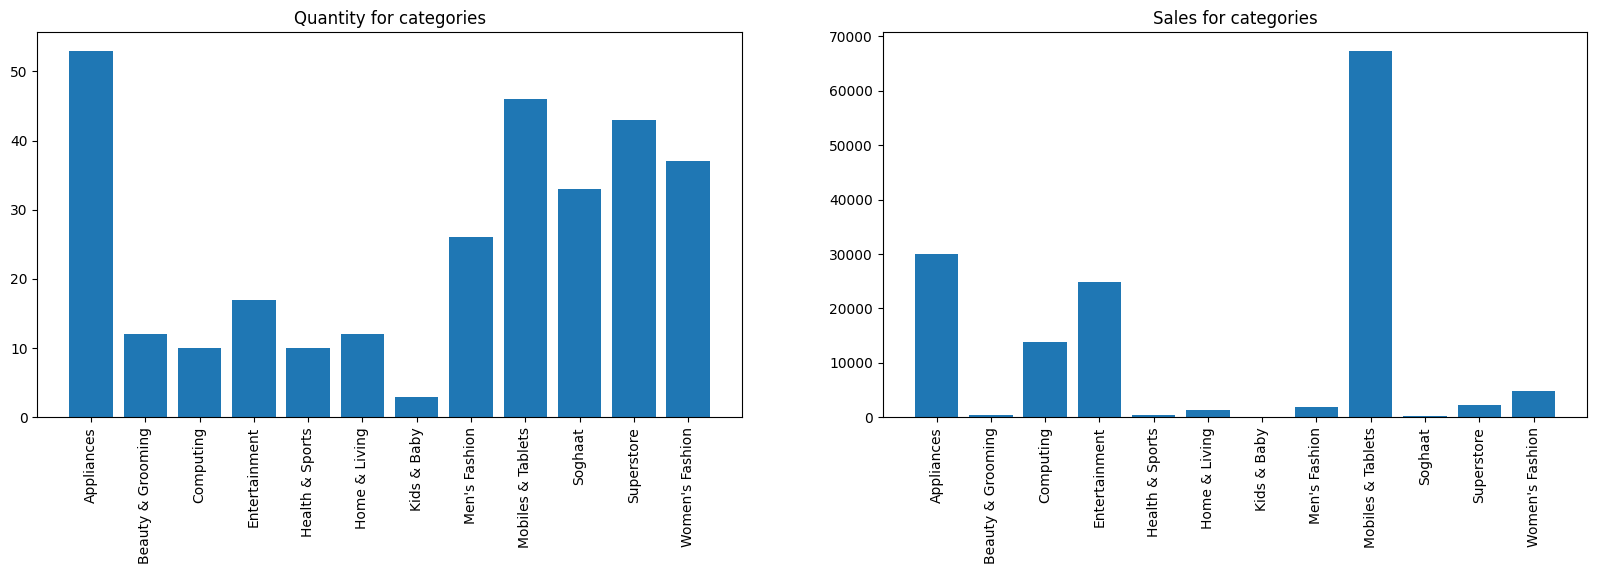

In [ ]:
#Sử dụng thư viện matplotlib để tạo đồ thị cột cho hai biến 'Quantity for categories' và 'Sales for categories'
qty_for_ctg = df_copy.groupby(['category']).agg({'qty_ordered':'sum'})
sales_for_ctg = df_copy.groupby(['category']).agg({'total':'sum'})

fig , ax = plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Quantity for categories')
ax[0].bar(qty_for_ctg.index,qty_for_ctg['qty_ordered'])
ax[0].set_xticklabels(qty_for_ctg.index,rotation = 90)

ax[1].set_title('Sales for categories')
ax[1].bar(sales_for_ctg.index,sales_for_ctg['total'])
ax[1].set_xticklabels(qty_for_ctg.index,rotation = 90)

plt.show()

In [ ]:
df_copy

,status,qty_ordered,price,value,discount_amount,total,category,age,Sign in date,City,State,Zip,Region,Discount_Percent,order_date
22,complete,2,254.8,509.6,101.920,407.680,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
23,complete,2,315.5,631.0,126.200,504.800,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
24,complete,2,69.8,139.6,27.920,111.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
25,complete,2,499.8,999.6,199.920,799.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
126,complete,1,24.9,24.9,2.490,22.410,Men's Fashion,38,07/20/2003,Phoenix,AZ,85015,West,10.000000,2020-12-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2981,complete,1,181.0,181.0,18.100,162.900,Men's Fashion,36,05/11/2015,Neely,MS,39461,South,10.000000,2021-4-1
2982,complete,2,384.2,768.4,153.680,614.720,Computing,36,05/11/2015,Neely,MS,39461,South,20.000000,2021-4-1
2999,complete,1,70.0,70.0,13.346,56.654,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.065714,2020-10-1
3000,complete,1,24.9,24.9,4.747,20.153,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.064257,2020-10-1


In [ ]:
#Nhóm dữ liệu trong cột 'total' theo giá trị của cột 'State',sau đó tính tổng giá trị của cột total cho mỗi 'State'
sales_for_state = df_copy.groupby(['State']).agg({'total':'sum'})
sales_for_state

,total
State,
AZ,296.730
CA,1607.339
CT,84.900
FL,1823.840
HI,2031.200
IA,35825.178
ID,141.000
IL,6988.870
KS,599.400


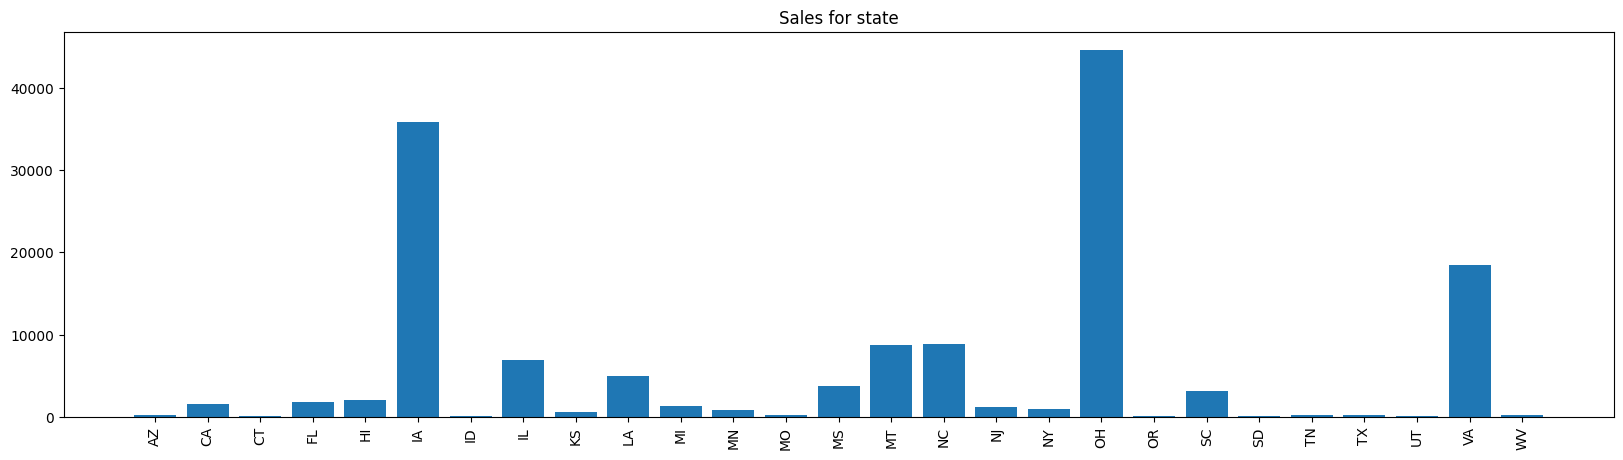

In [ ]:
#Sử dụng thư viện matplotlib để tạo một biểu đồ cột cho biến 'Sales for state'
plt.figure(figsize = (20,5))

plt.title('Sales for state')
plt.bar(sales_for_state.index,sales_for_state['total'])
plt.xticks(rotation=90)

plt.show()

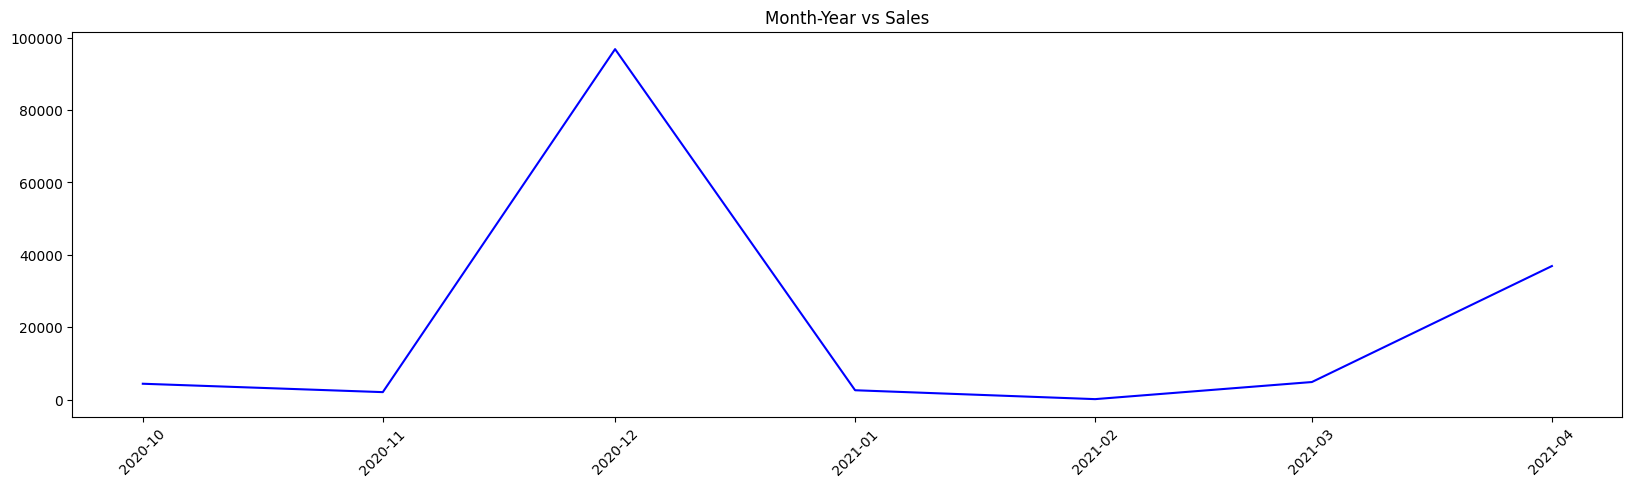

In [ ]:
#Sử dụng thư viện matplotlib và pandas để tạo một biểu đồ đường cho biến 'Month-Year vs Sales'
sales_for_months = df_copy.groupby(['order_date']).agg({'total':'sum'})
sales_for_months.reset_index(inplace=True)
sales_for_months['order_date'] = pd.to_datetime(sales_for_months['order_date'])
sales_for_months = sales_for_months.sort_values(by='order_date').reset_index(drop=True)
plt.figure(figsize = (20,5))

plt.title('Month-Year vs Sales')
plt.plot(sales_for_months['order_date'],sales_for_months['total'], c = 'b')
plt.xticks(rotation = 45)
plt.show()

In [ ]:
#Tạo một bản sao của DataFrame df_copy và lưu vào biến sales
sales = df_copy.copy()
#Tạo ra một danh sách của biến sales
sales.reset_index(drop=True,inplace=True)
sales

,status,qty_ordered,price,value,discount_amount,total,category,age,Sign in date,City,State,Zip,Region,Discount_Percent,order_date
0,complete,2,254.8,509.6,101.920,407.680,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
1,complete,2,315.5,631.0,126.200,504.800,Appliances,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
2,complete,2,69.8,139.6,27.920,111.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
3,complete,2,499.8,999.6,199.920,799.680,Home & Living,28,02/04/1981,Graham,FL,32042,South,20.000000,2020-12-1
4,complete,1,24.9,24.9,2.490,22.410,Men's Fashion,38,07/20/2003,Phoenix,AZ,85015,West,10.000000,2020-12-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,complete,1,181.0,181.0,18.100,162.900,Men's Fashion,36,05/11/2015,Neely,MS,39461,South,10.000000,2021-4-1
189,complete,2,384.2,768.4,153.680,614.720,Computing,36,05/11/2015,Neely,MS,39461,South,20.000000,2021-4-1
190,complete,1,70.0,70.0,13.346,56.654,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.065714,2020-10-1
191,complete,1,24.9,24.9,4.747,20.153,Men's Fashion,40,05/19/2017,Cheshire,CT,6408,Northeast,19.064257,2020-10-1


In [ ]:
#In ra các giá trị
print("General statitics info")
print('-'*60)
print(sales.describe())
print('-'*60)
print("Kurtosis")
print(stats.kurtosis(sales['total']))
print('-'*60)
print("Skewness")
print(stats.skew(sales['total']))

General statitics info
------------------------------------------------------------
       qty_ordered        price        value  discount_amount        total  \
count   193.000000   193.000000   193.000000       193.000000   193.000000   
mean      1.564767   821.712295   899.057337       134.217544   764.839793   
std       1.166906  1322.624385  1317.696454       188.443649  1146.396213   
min       1.000000     2.700000     2.700000         0.270000     2.430000   
25%       1.000000    59.900000    94.900000        12.990000    76.800000   
50%       1.000000   174.900000   279.600000        52.970000   210.000000   
75%       2.000000  1273.700000  1314.400000       199.990000  1133.700000   
max      10.000000  7031.300000  7031.300000      1100.000000  6181.300000   

              age           Zip  Discount_Percent  
count  193.000000    193.000000        193.000000  
mean    44.072539  52542.305699         17.145418  
std     13.791034  21747.438702          9.411124  
min  

<Axes: xlabel='total'>

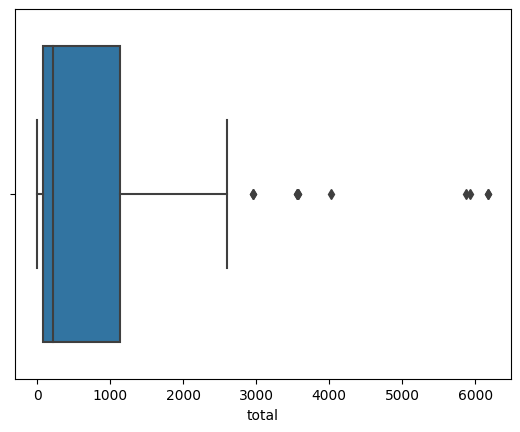

In [ ]:
#Sử dụng thư viện Seaborn để tạo một biểu đồ boxplot cho biến 'total'
sns.boxplot(x=sales['total'])

C:\Users\giangle\AppData\Local\Temp\ipykernel_22100\1256896223.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(sales['total'],25,interpolation='midpoint')
C:\Users\giangle\AppData\Local\Temp\ipykernel_22100\1256896223.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q3 = np.percentile(sales['total'],75,interpolation='midpoint')


<Axes: xlabel='total'>

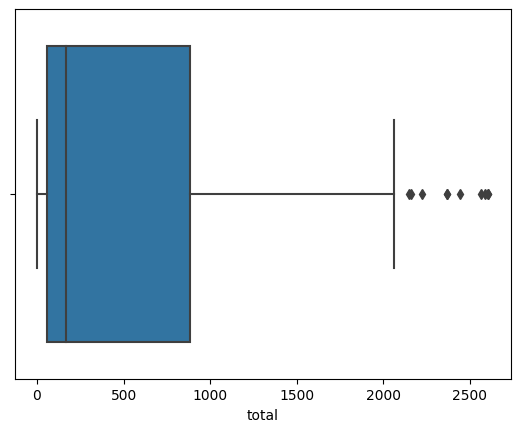

In [ ]:
#Đoạn mã trên tính toán giá trị Q1 (quartile 1), Q3 (quartile 3) và IQR (interquartile range) của cột 'total' trong DataFrame sales bằng cách sử dụng hàm np.percentile từ thư viện NumPy.
#Sau đó, nó sử dụng giá trị Q1, Q3 và IQR để xác định các giá trị ngoại lệ trong cột 'total'.

Q1 = np.percentile(sales['total'],25,interpolation='midpoint')
Q3 = np.percentile(sales['total'],75,interpolation='midpoint')
IQR = Q3-Q1

upper = np.where(sales['total'] >= (Q3+1.5*IQR))
lower = np.where(sales['total'] <= (Q1-1.5*IQR))

sales.drop(upper[0],inplace=True)
sales.drop(lower[0],inplace=True)

sns.boxplot(x=sales['total'])

In [ ]:
##In ra các giá trị
print("General statitics inf without outliers")
print('-'*60)
print(sales.describe())
print('-'*60)
print("Kurtosis")
print(stats.kurtosis(sales['total']))
print('-'*60)
print("Skewness")
print(stats.skew(sales['total']))

General statitics inf without outliers
------------------------------------------------------------
       qty_ordered        price        value  discount_amount        total  \
count   182.000000   182.000000   182.000000       182.000000   182.000000   
mean      1.598901   566.193258   648.213000       102.960363   545.252637   
std       1.193259   752.269478   770.628676       127.007099   666.364319   
min       1.000000     2.700000     2.700000         0.270000     2.430000   
25%       1.000000    52.475000    73.625000        12.604000    60.127500   
50%       1.000000   140.000000   210.000000        48.021000   165.450000   
75%       2.000000   849.525000  1108.200000       190.712707   882.697500   
max      10.000000  2896.000000  2896.000000       800.000000  2606.400000   

              age           Zip  Discount_Percent  
count  182.000000    182.000000        182.000000  
mean    43.862637  53226.456044         17.411894  
std     13.855522  21983.461514          

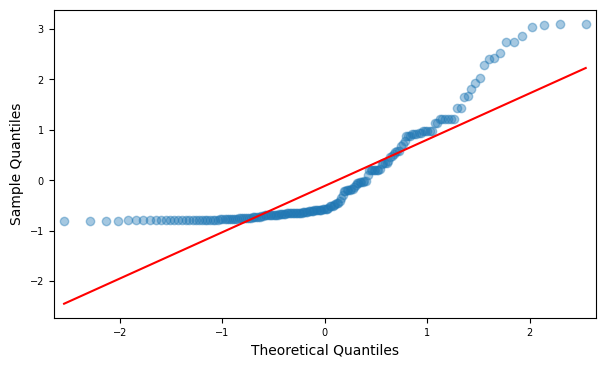

In [ ]:
#Tạo một biểu đồ quantile-quantile (QQ plot) sử dụng thư viện statsmodels và matplotlib
#để kiểm tra tính chuẩn của phân phối của cột 'total'
fig, ax = plt.subplots(figsize=(7,4))
sm.qqplot(
    sales['total'],
    fit   = True,
    line  = 'q',
    alpha = 0.4,
    lw    = 2,
    ax    = ax
)
ax.tick_params(labelsize = 7)

(array([3.29167716e-03, 9.70622752e-04, 1.26602968e-04, 5.90813849e-04,
        1.26602968e-04, 5.06411871e-04, 1.68803957e-04, 2.11004946e-04,
        3.79808903e-04, 2.95406925e-04, 2.53205935e-04, 8.44019784e-05,
        8.44019784e-05, 4.22009892e-05, 8.44019784e-05, 4.22009892e-05,
        8.44019784e-05, 4.22009892e-05, 1.26602968e-04, 1.68803957e-04]),
 array([2.4300000e+00, 1.3262850e+02, 2.6282700e+02, 3.9302550e+02,
        5.2322400e+02, 6.5342250e+02, 7.8362100e+02, 9.1381950e+02,
        1.0440180e+03, 1.1742165e+03, 1.3044150e+03, 1.4346135e+03,
        1.5648120e+03, 1.6950105e+03, 1.8252090e+03, 1.9554075e+03,
        2.0856060e+03, 2.2158045e+03, 2.3460030e+03, 2.4762015e+03,
        2.6064000e+03]),
 <BarContainer object of 20 artists>)

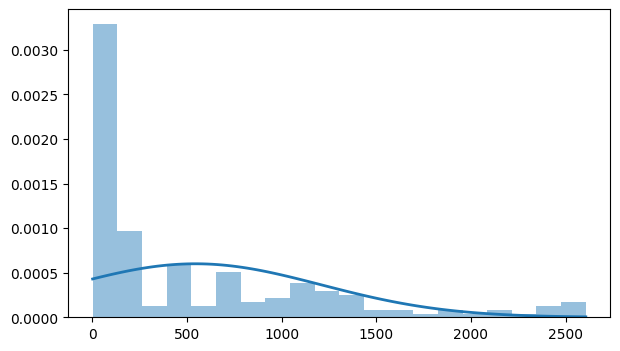

In [ ]:
#Vẽ một biểu đồ histogram của cột 'total' trong DataFrame 'sales', cùng với đường cong phân phối xác suất mật độ của phân phối chuẩn tương ứng.
mu, sigma = stats.norm.fit(sales['total'])
x_hat = np.linspace(min(sales['total']), max(sales['total']), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=sales['total'], density=True, bins=20, color="#3182bd", alpha=0.5)

In [ ]:
#Tính ma trận tương quan (correlation matrix) giữa các cột có kiểu dữ liệu số (kiểu số nguyên và kiểu số thực) trong DataFrame 'sales'
sales.select_dtypes(include=['int','float64']).corr()

,qty_ordered,price,value,discount_amount,total,age,Zip,Discount_Percent
qty_ordered,1.000000,-0.287967,-0.120652,0.180363,-0.173907,-0.229916,0.043346,0.773492
price,-0.287967,1.000000,0.951811,0.671634,0.972727,0.102637,-0.206882,-0.275583
value,-0.120652,0.951811,1.000000,0.847803,0.994879,0.048515,-0.239498,-0.134614
discount_amount,0.180363,0.671634,0.847803,1.000000,0.789859,-0.041936,-0.252861,0.204669
total,-0.173907,0.972727,0.994879,0.789859,1.000000,0.064099,-0.228777,-0.194686
age,-0.229916,0.102637,0.048515,-0.041936,0.064099,1.000000,0.343253,-0.340798
Zip,0.043346,-0.206882,-0.239498,-0.252861,-0.228777,0.343253,1.000000,0.009297
Discount_Percent,0.773492,-0.275583,-0.134614,0.204669,-0.194686,-0.340798,0.009297,1.000000


In [ ]:
#Lựa chọn các cột có kiểu dữ liệu là số nguyên hoặc số thực từ DataFrame và lưu và biến X
X = sales.select_dtypes(include=['int','float64'])
#Loại bỏ các cột 'age', 'Zip', 'total', 'value' khỏi DataFrame X
X.drop(columns=['age','Zip','total','value'],inplace=True)
#Lựa chọn cột 'total' từ DataFrame sales và lưu vào biến 'Y'
Y = sales['total']

# chia dữ liệu thành train và test
x_train,x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Linear regression
reg = LinearRegression()
reg.fit(x_train,y_train)
y_predict = reg.predict(x_test)

# Coefficients
print('Coefficients: ', reg.coef_)
print('Intercept: ', reg.intercept_)
#Thể hiện mức độ phù hợp của mô hình (càng gần 1 thì càng phù hợp)
print('R-squared score (training): {:.3f}'
     .format(reg.score(x_train, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(reg.score(x_test, y_test)))

print('Mean Absolute error',mean_absolute_error(y_test, y_predict))
print('Mean and std',np.mean(y_test), np.std(y_test))

Coefficients:  [39.69764714  0.70936788  1.39284705 -6.164689  ]
Intercept:  49.09865905179129
R-squared score (training): 0.982
R-squared score (test): 0.988

Mean Absolute error 45.77343899598914
Mean and std 556.6856591891892 603.671005687693
